## Load Data

Loading the data using given pickle files.

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
#                                                                test_size=0.20, random_state=30)

print(X_train.shape[0])

34799


Explore the data

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np


# TODO: Number of training examples

n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]
print(np.mean(X_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

82.677589037
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

1


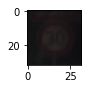

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

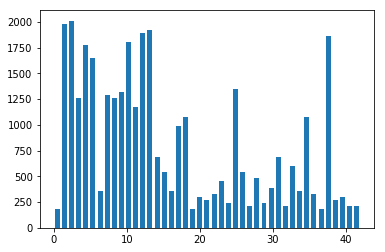

In [4]:
# Histogram of how the train data is distributed amung the classes.
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Data set is pretty imbalance. During pre processing I am trying to get this close to balance for a better preformce. I am trying to get low capacity classes up by adding some augmented data.

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

(32, 32)
10
81.9172385241


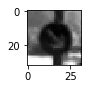

In [6]:
# convert to Grey scale

import cv2

def greyscale(x):
    res = []
    for i in range(0, len(x)):
        res.append(cv2.cvtColor(x[i], cv2.COLOR_RGB2GRAY))
    res = np.reshape(res,[-1,32,32,1])
    return res

X_train = greyscale(X_train)
X_valid = greyscale(X_valid)
X_test  = greyscale(X_test)
        
index = random.randint(0, len(X_valid))
image = X_valid[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray')

print(image.shape)
print(y_train[index]) 

print(np.mean(X_train))

(34799, 32, 32, 1)
9
(34799, 32, 32, 1)
0.297134071736


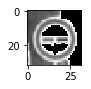

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 

def normalize(x):
    #.astype(np.uint8)
    x = (x - 255) / 255
    return x

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test  = normalize(X_test)



print(X_train.shape)


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray')
print(y_train[index])
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
print(X_train.shape)
print(np.mean(X_train))

9


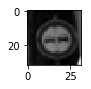

In [8]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray')
print(y_train[index])

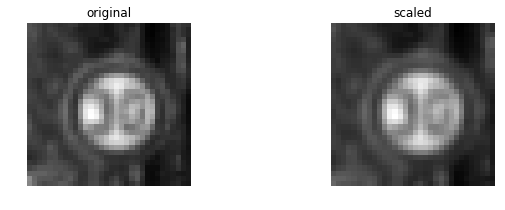

In [9]:
#Couple of Augmentation methods are being used in the below sections.
# Adapted the algorythms from different sources in the internet. Not my code most of the time. 
# https://github.com/benanne/kaggle-ndsb/blob/master/data.py#L315-L323
def scale(img):   
    rows,cols,_ = img.shape
    px = np.random.randint(-2,2)
    p1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    p2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(p1,p2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:,:,np.newaxis]
    return dst

index = random.randint(0, len(X_train))
test  = X_train[index]
tns   = scale(test)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(tns.squeeze(), cmap='gray')
axs[1].set_title('scaled')

(32, 32, 1)


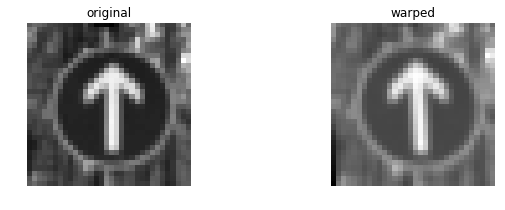

In [10]:
# Random Warp
def warp(img):
    
    rows,cols,_ = img.shape
    x = np.random.rand(3) - 0.5
    x *= cols * 0.06   
    y = np.random.rand(3) - 0.5
    y *= rows * 0.06
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    p1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    p2 = np.float32([[y1+y[0],x1+x[0]],
                       [y2+y[1],x1+x[1]],
                       [y1+y[2],x2+x[2]]])
    M = cv2.getAffineTransform(p1,p2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

index = random.randint(0, len(X_train))
test  = X_train[index]
tns   = warp(test)

print(tns.shape)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(tns.squeeze(), cmap='gray')
axs[1].set_title('warped')

In [ ]:
#I Dont think this is neccesary. Experimented with this but It ruins the image 
#Histogram Equalization
def histEquel(img):
    
    res = cv2.equalizeHist(img)
    res = np.reshape(res,[32,32,1])
    return res

index = random.randint(0, len(X_train))
test  = X_train[index]
tns   = histEquel(test)

print(tns.shape)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(tns.squeeze(), cmap='gray')
axs[1].set_title('HistEquel')

## Augmentation

If the example count of a given class is less than 800, which is the average sample size, I apply random Augmentation to increase the number of examples, so the dataset will be more balanced. 

In [11]:
for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    class_len     = len(class_indices[0])
    #Average sample size is around 800 (34799/43)
    if class_len < 800:
        #Here I randomly pick an image from the list that belongs a given class 
        #apply the augmentation and append the new image to the training set. 
        #We have to do it untill we reach the number 800
        for i in range(800 - class_len):
            index     = random.randint(0, class_len-1)
            #print(index)
            new_image = scale(warp(X_train[class_indices[0][index]]))
            X_train = np.concatenate((X_train, [new_image]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
        
print(X_train.shape)
    

(46480, 32, 32, 1)


In [13]:
#Save new data so I dont have to do the above step all over again. 

new_train = {'features': X_train,
             'labels': y_train}

pickle.dump(new_train, open( "new_train.p", "wb" ) )

In [17]:
new_training_file = 'new_train.p'
with open(new_training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']    

print(X_train.shape)

(46480, 32, 32, 1)


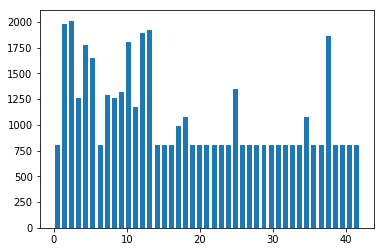

In [18]:
# The New histogram after augmentation.
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [19]:
#New Training Data set
print(X_train.shape)

(46480, 32, 32, 1)


In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                               test_size=0.20, random_state=40)
X_train, y_train = shuffle(X_train, y_train)

print(X_train.shape)
print(X_valid.shape)

(37184, 32, 32, 1)
(9296, 32, 32, 1)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [21]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 100

## Design and implement the model

In [22]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400)) 
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

                     
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv2flat = flatten(conv2)

    
    # Flatten x. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)
    

    # Concat conv2flat and conv3flat. Input = 400 and 400. Output = 800
    fc0 = tf.concat_v2([conv2flat, conv3flat], 1)
    
    #Dropout
    fc0    = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc0, fc1_W) + fc1_b
    
    
    return logits

## Features and Labels


`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.



In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline


In [26]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    #print(num_examples)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        #print(accuracy)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.810

EPOCH 2 ...
Validation Accuracy = 0.913

EPOCH 3 ...
Validation Accuracy = 0.953

EPOCH 4 ...
Validation Accuracy = 0.967

EPOCH 5 ...
Validation Accuracy = 0.968

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.980

EPOCH 8 ...
Validation Accuracy = 0.981

EPOCH 9 ...
Validation Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.984

EPOCH 11 ...
Validation Accuracy = 0.985

EPOCH 12 ...
Validation Accuracy = 0.984

EPOCH 13 ...
Validation Accuracy = 0.988

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.986

EPOCH 16 ...
Validation Accuracy = 0.988

EPOCH 17 ...
Validation Accuracy = 0.988

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.987

EPOCH 21 ...
Validation Accuracy = 0.989

EPOCH 22 ...
Validation Accuracy = 0.988

EPOCH 23 ...
Validation Accuracy = 0.987

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [31]:
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.910


#### Test the Model On New Images

In this section, I am using random Germen traffic signes I downloaded from the internet to test my model on. 

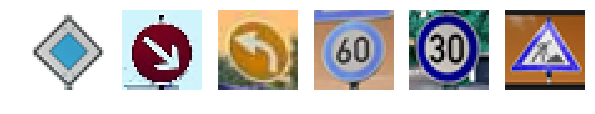

In [32]:
import glob
images = [cv2.imread(file) for file in glob.glob("./WebImages/*.png")]

fig, axs = plt.subplots(1,6, figsize=(10, 3))

for i in range(len(images)):
    axs[i].axis('off')
    axs[i].imshow(images[i].squeeze(), cmap='gray')




In [33]:
import PIL
from PIL import Image

import os
image_list = os.listdir("./WebImages/")
Web_imgs = []
Web_Test = []
for i in range(len(image_list)):
    print(i)
    img = Image.open("./WebImages/" + image_list[i])
    img = img.resize((32,32), Image.ANTIALIAS)

    img = np.asarray(img)
    print(img.shape)
    Web_imgs.append(img)
    
Web_Test = np.asarray(Web_imgs)
print(Web_Test.shape)

0
(32, 32, 4)
1
(32, 32, 4)
2
(32, 32, 4)
3
(32, 32, 4)
4
(32, 32, 4)
5
(32, 32, 4)
(6, 32, 32, 4)


(6, 32, 32, 1)


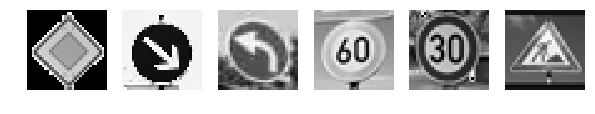

In [34]:
#Convert to Grascale
Web_Test = greyscale(Web_Test)
Web_Test = normalize(Web_Test)

fig, axs = plt.subplots(1,6, figsize=(10, 3))

for i in range(len(Web_Test)):
    axs[i].axis('off')
    axs[i].imshow(Web_Test[i].squeeze(), cmap='gray')
    
print(Web_Test.shape)

In [70]:


#Create the Image Labels


Web_labels = [12,38,34,3,1,25]

In [71]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(Web_Test, Web_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


In [72]:
print(logits)

Tensor("add_6:0", shape=(?, 43), dtype=float32)


#### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Here, I am displaying the top 5 Softmax for each test image I downloaded from the web. 


In [80]:
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_logits = sess.run(softmax, feed_dict={x: Web_Test, keep_prob: 1.0})
    print(softmax_logits)
    top_k_probs = sess.run(top_k, feed_dict={x: Web_Test, keep_prob: 1.0} )
    
    print(top_k_probs)
    predicted_classes = top_k_probs[1]
    prob_classes = top_k_probs[0]
    print(predicted_classes)
    prediction = []
    probs = []
    for guess in  predicted_classes:
        prediction.append(guess[0])
        
    for pr in  prob_classes:
        probs.append(pr[0] * 100)
    
    #print(prediction)

[[  0.00000000e+00   2.93491650e-38   1.84554226e-24   3.04730341e-24
    0.00000000e+00   1.90734561e-25   1.14085033e-32   2.39247088e-21
    5.80405681e-36   6.40473179e-29   1.67290428e-29   6.21689434e-30
    1.00000000e+00   4.85055876e-30   3.53527175e-31   6.66680659e-14
    0.00000000e+00   0.00000000e+00   1.27956764e-35   0.00000000e+00
    4.88519932e-34   1.08083111e-26   0.00000000e+00   9.90030615e-35
    1.82455091e-37   3.27852371e-30   1.18536357e-34   0.00000000e+00
    2.95303543e-20   2.11368988e-24   4.64140257e-27   0.00000000e+00
    1.26748627e-19   7.27813158e-31   8.00052533e-35   1.37660242e-22
    1.95609230e-36   1.66074024e-37   1.40602684e-28   9.36781387e-34
    4.21554192e-22   2.76572316e-25   9.19865619e-33]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.13775703e-30 

Below, you can see the actual classes that I assigned to my images agaist the predicted classes. The model got all the images correct. 

In [81]:
print("Actual Classes : ")
print(Web_labels)
print("Predictions    : ")
print(prediction)

print("Probabilities    : ")
print(probs)

Actual Classes : 
[12, 38, 34, 3, 1, 25]
Predictions    : 
[12, 38, 34, 3, 1, 25]
Probabilities    : 
[100.0, 100.0, 100.0, 97.210103273391724, 99.998652935028076, 99.956899881362915]


In [82]:
## Get sample image of a given class

def getSampleImage(index):
    class_indices = np.where(y_train == index)
    return X_train[class_indices[0][0]]


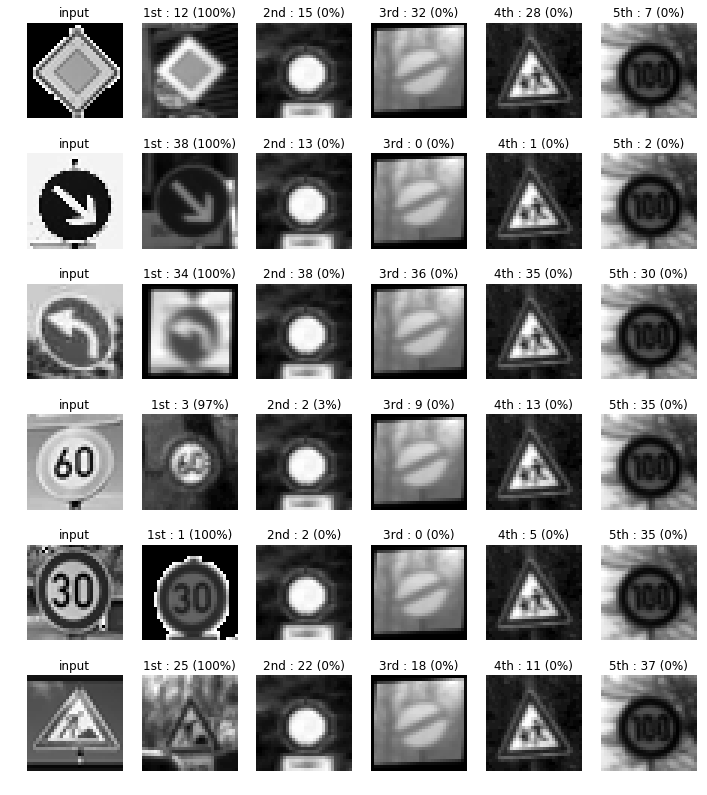

In [105]:
# Here I am displaying how the model predicted the first image
fig, axs = plt.subplots(6,6, figsize=(12, 14))
axs = axs.flatten()
for i in range(6):
    axs[6*i].axis('off')
    axs[6*i].imshow(Web_Test[i].squeeze(), cmap='gray')
    axs[6*i].set_title('input')

    axs[6*i + 1].axis('off')
    axs[6*i + 1].imshow(getSampleImage(predicted_classes[i][0]).squeeze(), cmap='gray')
    axs[6*i + 1].set_title('1st : {} ({:.0f}%)'.format(predicted_classes[i][0], prob_classes[i][0] * 100))

    axs[6*i + 2].axis('off')
    axs[6*i + 2].imshow(getSampleImage(predicted_classes[0][1]).squeeze(), cmap='gray')
    axs[6*i + 2].set_title('2nd : {} ({:.0f}%)'.format(predicted_classes[i][1], prob_classes[i][1] * 100))

    axs[6*i + 3].axis('off')
    axs[6*i + 3].imshow(getSampleImage(predicted_classes[0][2]).squeeze(), cmap='gray')
    axs[6*i + 3].set_title('3rd : {} ({:.0f}%)'.format(predicted_classes[i][2], prob_classes[i][2] * 100))

    axs[6*i + 4].axis('off')
    axs[6*i + 4].imshow(getSampleImage(predicted_classes[0][3]).squeeze(), cmap='gray')
    axs[6*i + 4].set_title('4th : {} ({:.0f}%)'.format(predicted_classes[i][3], prob_classes[i][3] * 100))

    axs[6*i + 5].axis('off')
    axs[6*i + 5].imshow(getSampleImage(predicted_classes[0][4]).squeeze(), cmap='gray')
    axs[6*i + 5].set_title('5th : {} ({:.0f}%)'.format(predicted_classes[i][4], prob_classes[i][4] * 100))
